In [ ]:
import torch

from src.mlops_project.data import corrupt_mnist

In [ ]:
train_data, test = corrupt_mnist()

train_data

c:\Users\sofie\OneDrive - Danmarks Tekniske Universitet\Kandidat\1. semester\02476 - Machine learning operations\mlops\mlops_project\src\mlops_project\data.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues rela

In [ ]:
assert len(train_data) == 30000
assert len(test) == 5000

In [ ]:
for dataset in [train_data,test]:
    for x, y in dataset:
        assert x.shape == torch.Size([1,28,28])
        assert y in range (10)

In [ ]:
train_targets = torch.unique(train_data.tensors[1])
assert (train_targets == torch.arange(0,10)).all()
test_targets = torch.unique(test.tensors[1])
assert (test_targets == torch.arange(0,10)).all()


In [7]:
x.shape

torch.Size([1, 28, 28])

c:\Users\sofie\OneDrive - Danmarks Tekniske Universitet\Kandidat\1. semester\02476 - Machine learning operations\mlops\mlops_project\src\mlops_project\data.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues rela

Epoch 0, iter 0, loss: 2.3114683628082275
Epoch 0, iter 100, loss: 0.5596163868904114
Epoch 0, iter 200, loss: 0.9455568194389343
Epoch 0, iter 300, loss: 0.6240434646606445
Epoch 0, iter 400, loss: 0.3260778784751892
Epoch 0, iter 500, loss: 1.343723177909851
Epoch 0, iter 600, loss: 0.6831945776939392
Epoch 0, iter 700, loss: 0.2691325545310974
Epoch 0, iter 800, loss: 0.143304705619812
Epoch 0, iter 900, loss: 0.2527448236942291
Epoch 1, iter 0, loss: 0.3844076097011566
Epoch 1, iter 100, loss: 0.2207796424627304
Epoch 1, iter 200, loss: 0.28839707374572754
Epoch 1, iter 300, loss: 0.40940508246421814
Epoch 1, iter 400, loss: 0.08800771832466125
Epoch 1, iter 500, loss: 0.9941955208778381
Epoch 1, iter 600, loss: 0.11989948153495789
Epoch 1, iter 700, loss: 0.18202432990074158
Epoch 1, iter 800, loss: 0.07664072513580322
Epoch 1, iter 900, loss: 0.07923705875873566
Done training


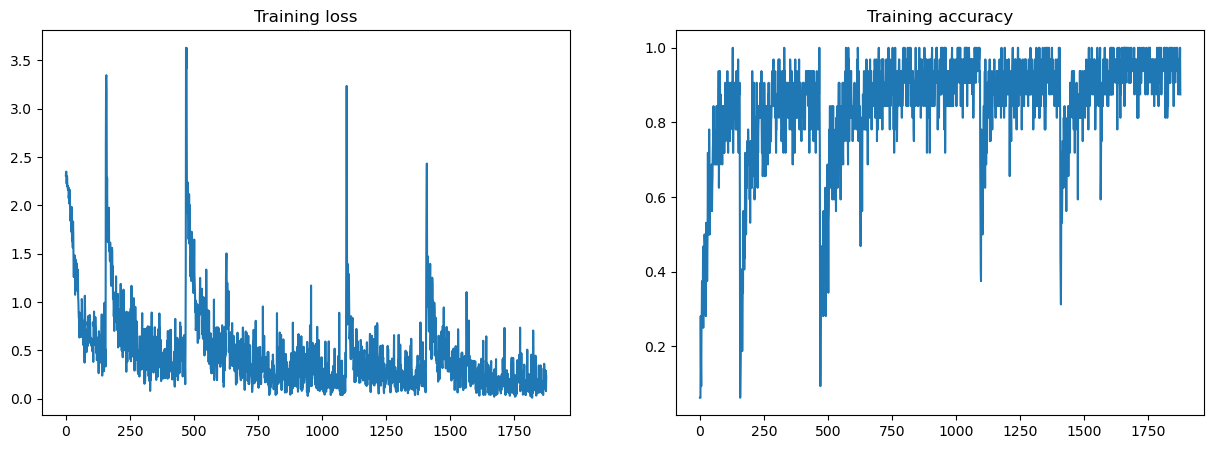

In [20]:
import os

from hydra import compose, initialize_config_dir

from src.mlops_project.train import train

# Get absolute path to configs
config_path = os.path.abspath("configs")

with initialize_config_dir(version_base=None, config_dir=config_path):
    cfg = compose(config_name="config", overrides=["epochs=2"])

    # Import here to avoid Hydra initialization issues
    from src.mlops_project.train import train
    train(cfg)